In [1]:
import os, shutil

original_dataset_dir = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset"

base_dir = "C:/Users/usaid/Documents/CovidDataset" 
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir) 

validation_dir = os.path.join(base_dir, 'validation') 
os.mkdir(validation_dir) 

#test_dir = os.path.join(base_dir, 'test') 
#os.mkdir(test_dir)

train_covid_dir = os.path.join(train_dir, 'train_covid') 
os.mkdir(train_covid_dir)

train_normal_dir = os.path.join(train_dir, 'train_Normal') 
os.mkdir(train_normal_dir)

validation_covid_dir = os.path.join(validation_dir, 'val_covid') 
os.mkdir(validation_covid_dir)

validation_normal_dir = os.path.join(validation_dir, 'val_Normal') 
os.mkdir(validation_normal_dir)

#test_covid_dir = os.path.join(test_dir, 'test_covid') 
#os.mkdir(test_covid_dir)

#test_normal_dir = os.path.join(test_dir, 'test_Normal') 
#os.mkdir(test_normal_dir)

In [ ]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Train/Covid"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'Covid'+str(i)+'.jpeg'))
    i = i + 1
    
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Train/Normal"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'Normal'+str(i)+'.jpeg'))
    i = i + 1 

In [ ]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Val/Covid"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'Covid'+str(i)+'.jpeg'))
    i = i + 1
    
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Val/Normal"
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'Normal'+str(i)+'.jpeg'))
    i = i + 1 

In [2]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Train/Covid"
fnames = ['Covid{}.jpeg'.format(i) for i in range(112)] 
for fname in fnames: 
    src = os.path.join(path, fname) 
    dst = os.path.join(train_covid_dir, fname) 
    shutil.copyfile(src, dst)        

In [3]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Train/Normal"
fnames = ['Normal{}.jpeg'.format(i) for i in range(112)] 
for fname in fnames: 
    src = os.path.join(path, fname) 
    dst = os.path.join(train_normal_dir, fname) 
    shutil.copyfile(src, dst)        

In [4]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Val/Covid"
fnames = ['Covid{}.jpeg'.format(i) for i in range(30)] 
for fname in fnames: 
    src = os.path.join(path, fname) 
    dst = os.path.join(validation_covid_dir, fname) 
    shutil.copyfile(src, dst)        

In [5]:
path = "C:/Users/usaid/Desktop/Covid-19-Detection/CovidDataset/Val/Normal"
fnames = ['Normal{}.jpeg'.format(i) for i in range(30)] 
for fname in fnames: 
    src = os.path.join(path, fname) 
    dst = os.path.join(validation_normal_dir, fname) 
    shutil.copyfile(src, dst)        

In [6]:
print("total training covid images:", len(os.listdir(train_covid_dir)))
 
print("total training normal images:", len(os.listdir(train_normal_dir)))
 
print("total validation covid images:", len(os.listdir(validation_covid_dir)))
 
print("total validation normal images:", len(os.listdir(validation_normal_dir)))

total training covid images: 112
total training normal images: 112
total validation covid images: 30
total validation normal images: 30


In [16]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer="RMSprop",
              metrics=['acc'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest")

val_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    shear_range=0.0,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest")

In [18]:
#train_datagen = ImageDataGenerator(rescale= 1./255)
#val_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    batch_size=20,
    class_mode='binary')

val_generator = val_datagen.flow_from_directory( 
    validation_dir,
    target_size=(250, 250),
    batch_size=20,
    class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [19]:
history = model.fit_generator(
train_generator,
epochs = 20,
validation_data = val_generator)

Epoch 1/20
12/12 [==============================] - 9s 771ms/step - loss: 1.2888 - acc: 0.6339 - val_loss: 1.1821 - val_acc: 0.5000
Epoch 2/20
12/12 [==============================] - 7s 579ms/step - loss: 0.7773 - acc: 0.8884 - val_loss: 0.4662 - val_acc: 0.9167
Epoch 3/20
12/12 [==============================] - 7s 602ms/step - loss: 0.2879 - acc: 0.9062 - val_loss: 0.3011 - val_acc: 0.9000
Epoch 4/20
12/12 [==============================] - 7s 587ms/step - loss: 0.1339 - acc: 0.9420 - val_loss: 0.1243 - val_acc: 0.9667
Epoch 5/20
12/12 [==============================] - 7s 601ms/step - loss: 0.2963 - acc: 0.8705 - val_loss: 0.1753 - val_acc: 0.9500
Epoch 6/20
12/12 [==============================] - 7s 596ms/step - loss: 0.2445 - acc: 0.9286 - val_loss: 0.2832 - val_acc: 0.9167
Epoch 7/20
12/12 [==============================] - 7s 578ms/step - loss: 0.2053 - acc: 0.9375 - val_loss: 0.1685 - val_acc: 0.9500
Epoch 8/20
12/12 [==============================] - 7s 593ms/step - loss: 0.

In [20]:
model.evaluate_generator(val_generator)

[0.1841504747668902, 0.95]

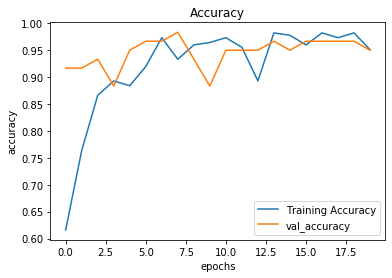

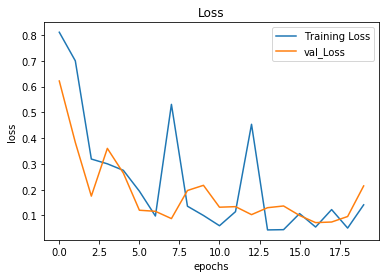

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history["acc"], label = "Training Accuracy")
plt.plot(history.history["val_acc"], label = "val_accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()

plt.figure()
plt.plot(history.history["loss"], label = "Training Loss")
plt.plot(history.history["val_loss"], label = "val_Loss")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()